In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm

from xgcm import Grid

# Plot melt rate with and without PG corrections

In [2]:
ice1 = xr.open_dataset('MOM6-examples-z-noMWIPG/ice.nc')
prog1 = xr.open_dataset('MOM6-examples-z-noMWIPG/prog.nc')

ice2 = xr.open_dataset('MOM6-examples-z/ice.nc')
prog2 = xr.open_dataset('MOM6-examples-z/prog.nc')

Text(0.01, 0.99, 'b')

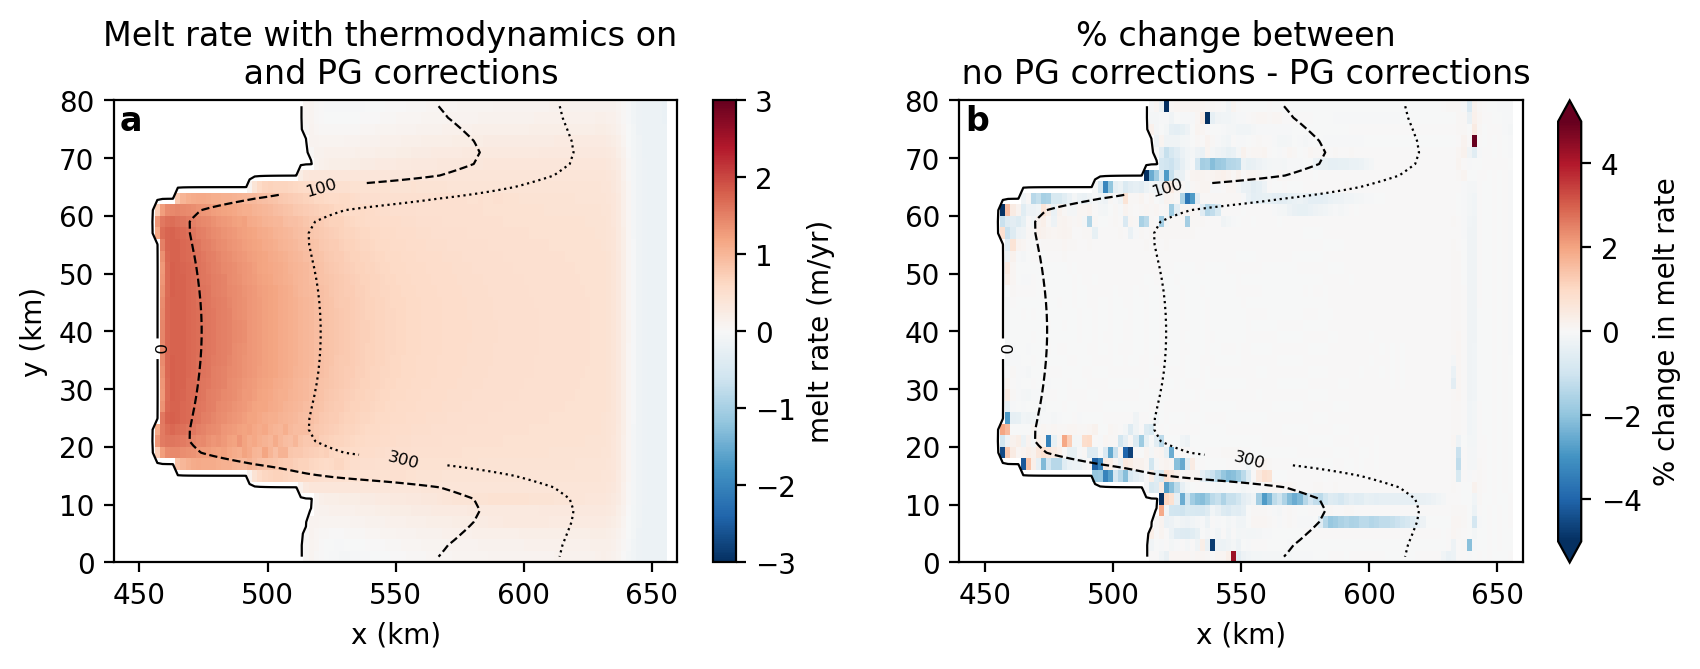

In [3]:
fig, axes = plt.subplots(ncols = 2, figsize = (10,3),dpi = 200)
(ice2.melt_rate.mean('Time')).where(ice2.melt_rate.mean('Time')!=0).plot(ax = axes[0], cmap = 'RdBu_r', vmin = -3, vmax = 3,cbar_kwargs = {'label':'melt rate (m/yr)'})
axes[0].set_title('Melt rate with thermodynamics on \n and PG corrections')
sum_h = prog2.h.isel(Time = 0).sum('zl')
CS1 = axes[0].contour(prog2.xh.values, prog2.yh.values,sum_h.values,levels = [0.5,100,300],colors = 'k', linewidths =0.8, linestyles = ['-','--','dotted'])
plt.clabel(CS1, CS1.levels, inline=True, fontsize=6,fmt ='%1.0f')

((ice1.melt_rate.mean('Time')-ice2.melt_rate.mean('Time'))/ice1.melt_rate.mean('Time')*100).plot(ax = axes[1],cmap = 'RdBu_r', vmin = -5, vmax = 5,cbar_kwargs = {'label':'% change in melt rate'})
axes[1].set_title('% change between \n no PG corrections - PG corrections')
CS1 = axes[1].contour(prog2.xh.values, prog2.yh.values,sum_h.values,levels = [0.5,100,300],colors = 'k', linewidths =0.8, linestyles = ['-','--','dotted'])
plt.clabel(CS1, CS1.levels, inline=True, fontsize=6,fmt ='%1.0f')

axes[0].set_ylabel('y (km)')
axes[0].set_xlabel('x (km)')

axes[1].set_ylabel('')
axes[1].set_xlabel('x (km)')

axes[0].set_xlim(440,660)
axes[1].set_xlim(440,660)

axes[0].text(0.01,0.99,'a', fontsize = 12, transform=axes[0].transAxes, fontweight='bold', va='top')
axes[1].text(0.01,0.99,'b', fontsize = 12, transform=axes[1].transAxes, fontweight='bold', va='top')

